In [20]:
!pip install konlpy

In [8]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 826 kB/s eta 0:00:01


In [19]:
!pip install -U pip

     |████████████████████████████████| 1.5 MB 747 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



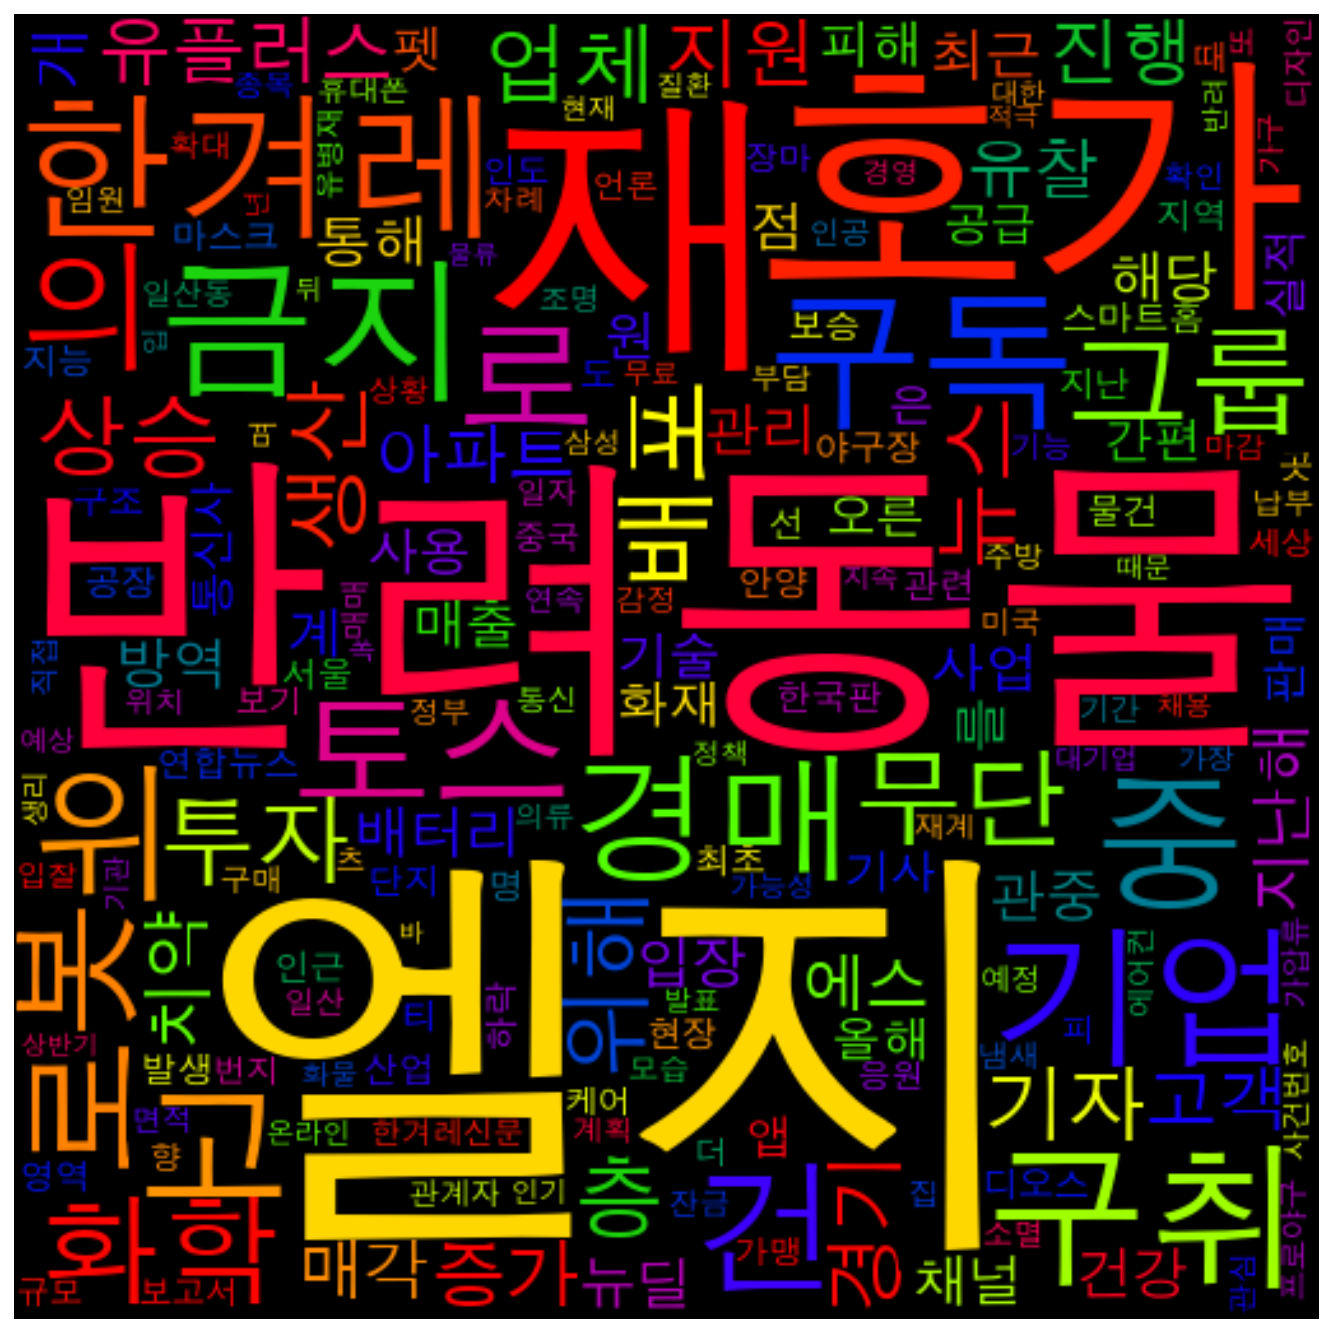

In [25]:
# -*- coding: utf-8 -*-

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

#크롤링 파일 오픈
file = open("result.txt", "r", encoding='UTF8')
lists = file.readlines()
file.close()

twitter = Okt()
morphs = []
for sentence in lists: morphs.append(twitter.pos(sentence))
print(morphs)

#전처리 및 명사 추출
noun_adj_adv_list=[]
for sentence in morphs :
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("저" not in word) and ("등" not in word) and ("전" not in word) and ("요" not in word) and ("분" not in word) and ("시" not in word) and ("카" not in word) and ("너" not in word) and ("및" not in word) and ("이" not in word) and ("거" not in word) and ("좀" not in word) and ("제" not in word) and ("후" not in word) and ("비" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): noun_adj_adv_list.append(word) 
        print(noun_adj_adv_list)

count = Counter(noun_adj_adv_list)
words = dict(count.most_common()) 
words

%matplotlib inline
import matplotlib 
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)
 
import numpy as np
import random 
from PIL import Image
 #마스킹 이미지 오픈
r4_mask = np.array(Image.open("mask.png"))
wordcloud = WordCloud(background_color="black", font_path = 'Libaray/Fonts/AppleGothic.ttf', colormap = "prism", width = 800, height = 800, mask = r4_mask ) 
wordcloud = wordcloud.generate_from_frequencies(words)
plt.figure(figsize=(12, 12)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()
